In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available.")
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
    # Get the name of the current CUDA device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device name: {torch.cuda.get_device_name(current_device)}")
else:
    print("CUDA is not available. Using CPU.")


CUDA is available.
Number of GPUs available: 1
Current CUDA device name: NVIDIA GeForce RTX 3070 Laptop GPU


In [2]:
import os
import subprocess
# Clone the repo and set the main directory
def git_clone(repo_url, target_directory):
    # Create the target directory if it doesn't exist
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    # Change directory to the target directory
    os.chdir(target_directory)

    # Git clone command
    subprocess.run(["git", "clone", repo_url])

# GitHub repository URL
repo_url = "https://github.com/TRG-AI4Good/RAPID_A.git"  # Replace with your repository URL

# Target directory where you want to clone the repository
cwd='D://LOL'  # Replace with your desired directory path

# Clone the repository
git_clone(repo_url, cwd)
os.chdir(cwd)
cwd=os.getcwd()+'/'


In [ ]:
# pip install required libraries
# Using subprocess to avoid any complications 
# Please make sure all librraies are installed correctly
import subprocess
with open(cwd+'requirements.txt', 'r') as file:
    # Iterate over each line in the file
    for line in file:
      command = f'pip install {line}'
      result = subprocess.run(command, shell=True, capture_output=True, text=True)

In [3]:
'''
This initialization automatically downloads the required data, listed as follows:

Data
│

1- Block Boundaries 

│── CSVS
│       └── Blocks_geom1.parquet
        └── Blocks_geom*.parquet

2- Google (post-event) and Bing (pre-event) Lahaina satellite images

│── CM_G_Concat
│       └── 1.png
        └── *.png

3- Deep segmentation models trained on Maras data (6 models with different channel augmnettaion and archi.)

│── Deep_Models
│       └── Model_2E_Eff.pth
│       └── *.pth

4- Lahaina ARIA tiff file

└── ARIA.tif

5- Inventory (we have many attributed there by combining FEMA+MIcrosoft+NSI, but the only required data is building footrpint geo-polygons

└── Inventory.pqrquet

6- Labels (optional): Labels for each of the inventory footprints 0: No damage, 1: D damage, 2: C damage

└── Geom_Labels.parquet

'''
import os
cwd+='RAPID_A/'
os.chdir(cwd)
cwd=os.getcwd()
from Main import RAPID_A
A=RAPID_A(cwd,640,640)

  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch 'C:\Users\solei\AppData\Local\Temp\pip-req-build-5ch5hk_l'


  Cloning https://github.com/qubvel/segmentation_models.pytorch to c:\users\solei\appdata\local\temp\pip-req-build-5ch5hk_l
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'



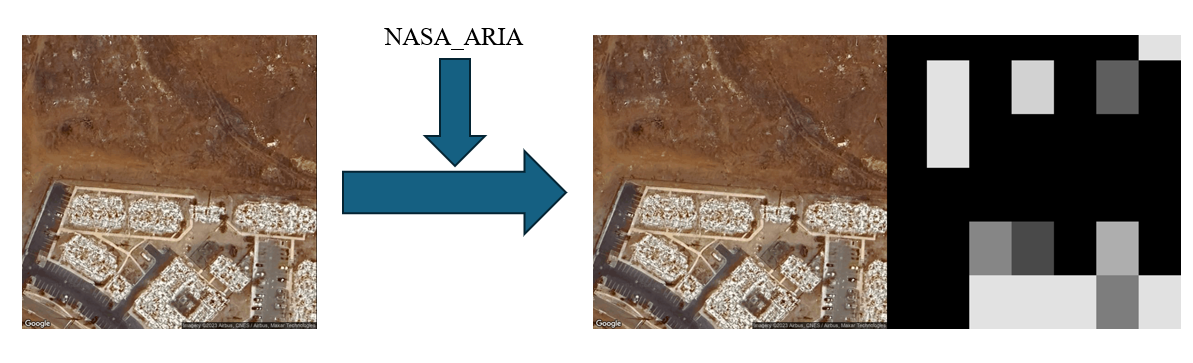

In [6]:
# Extract ARIA maps
'''
│── Data
│   └── G_Plus_ARIA
│       └── 1.png
│       └── 2.ong
'''
A.ARIA_maps()

Buiding block-wise ARIA maps:   0%|          | 0/1551 [00:00<?, ?it/s]

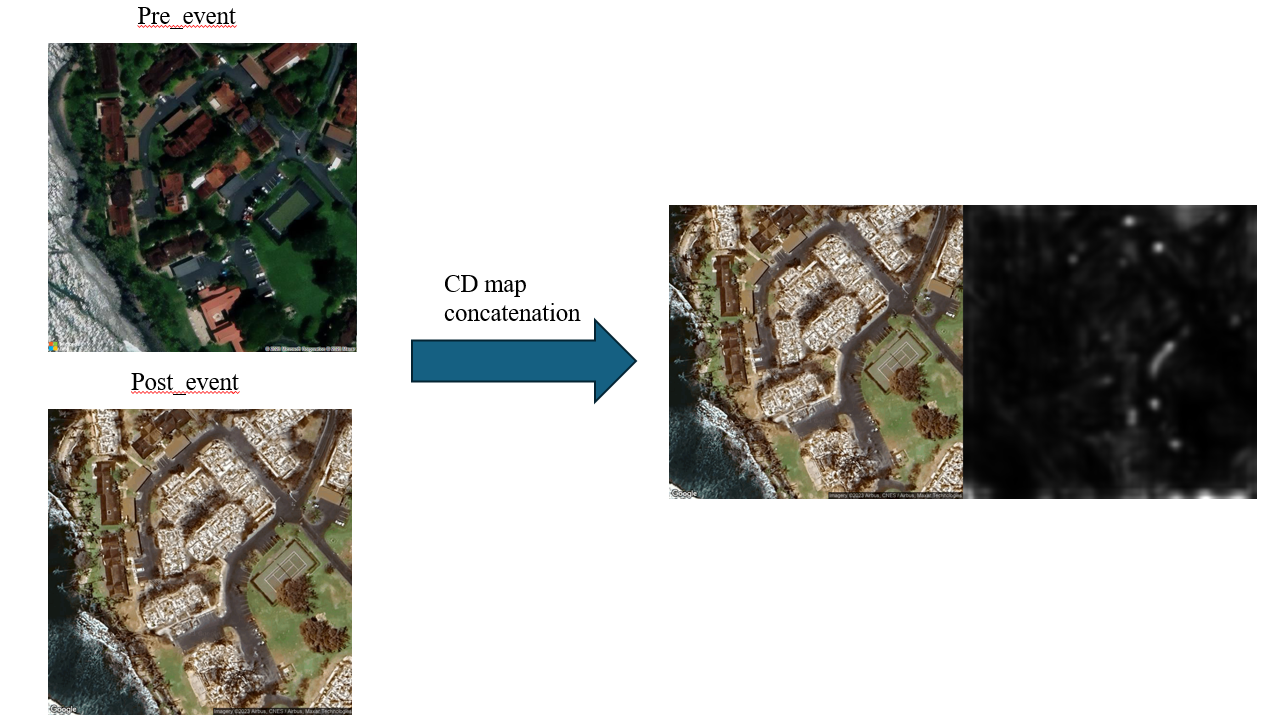

In [7]:
# Extract ARIA maps
'''
│── Data
│   └── G_Plus_CD
│       └── 1.png
│       └── 2.ong
'''
A.CD_maps()

Buiding block-wise CD maps:   0%|          | 0/1551 [00:00<?, ?it/s]

In [8]:
# Run ineference for models
'''
As outlined in the manuscript, there exists 6 models (CNN or Vit) * (normal, CD, and ARIA augmented inputs) and for each of C and D labels
│── Deep Models
│   └── Model-2E_Eff (C or D): CNN-based Efficient Net
│   └── Model-2E_Eff_CD (C or D): CNN-based Efficient Net
│   └── Model-2E_Eff_ARIA (C or D): CNN-based Efficient Net
│   └── Model-2E_Tra (C or D): CNN-based
│   └── Model-2E-Tra-CD (C or D): Vit-based 
│   └── Model-2E_Tra-ARIA (C or D): Vit-based 
'''
Models=['Model_2E_Eff','Model_2E_Eff_CD','Model_2E_Eff_ARIA','Model_2E_Tra','Model_2E_Tra_CD','Model_2E_Tra_ARIA']
## Building masks
A.Model_Mask(Models,['C','D'])

Model_2E_Eff's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

In [9]:
## Transforming segmentation masks into geo-polygons
'''
This module transformes all segemntation pieces in block images into geo-polygons and then merge all of them
into a single parquet file geometry for C and D damages
│── Results
│   └── Model-X
│       └── Shape_Files
│           └── D.aprquet
│           └── C.aprquet
'''
A.Mask_To_Poly(Models,['C','D'])

Masks to polygon for Model_2E_Eff Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_CD Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_CD Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_ARIA Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_ARIA Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_CD Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_CD Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_ARIA Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_ARIA Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]


 Accuracy estimation:
| Overlap Threshold   |   Collapsed |   Possibly |
|---------------------+-------------+------------|
| >10                 |          96 |        415 |
| >20                 |          82 |        375 |
| >30                 |          71 |        344 |
| >40                 |          64 |        310 |
| >50                 |          59 |        280 |
| >60                 |          47 |        240 |
| >70                 |          43 |        202 |
| >80                 |          31 |        156 |
| >90                 |          22 |        118 |


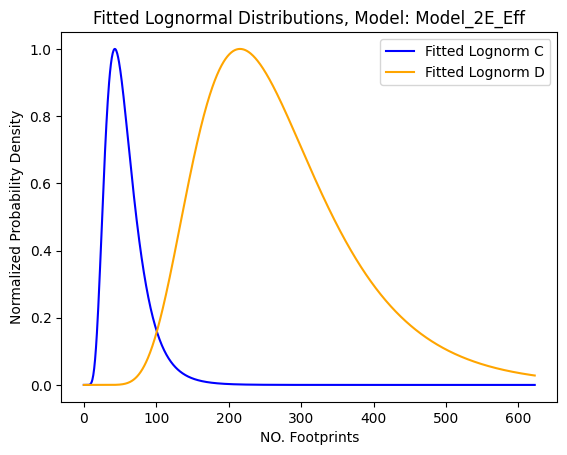

Labels are given, accuracy estimatation begins:
Model_2E_Eff's binary damage detection P-R-F1 scores=
 No damage: 2328 	Damage: 429
 Prec:	 0.6785109220676231 
 Recall:	 0.6104199750769863 
 F1:	 0.44777046811177657 

Model_2E_Eff's damage severity detection P-R-F1 scores=
 No: 2328 D damage: 73 	C Damage: 356
 Prec:	 0.5269539769963439 
 Recall:	 0.42467570257328296 
 F1:	 0.3269531038482417 


 Accuracy estimation:
| Overlap Threshold   |   Collapsed |   Possibly |
|---------------------+-------------+------------|
| >10                 |         147 |        716 |
| >20                 |         131 |        678 |
| >30                 |         121 |        636 |
| >40                 |         104 |        597 |
| >50                 |          95 |        559 |
| >60                 |          84 |        513 |
| >70                 |          67 |        461 |
| >80                 |          55 |        413 |
| >90                 |          41 |        322 |


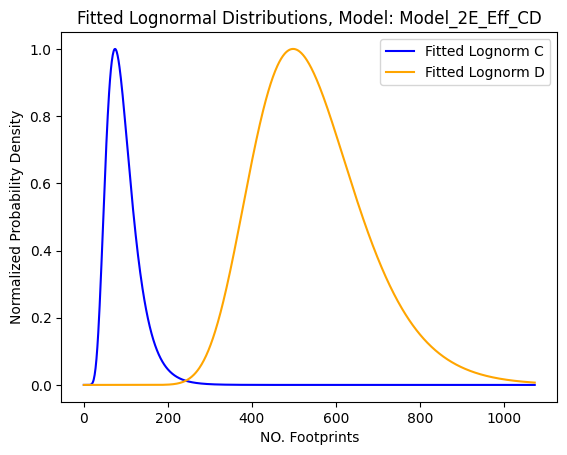

Labels are given, accuracy estimatation begins:
Model_2E_Eff_CD's binary damage detection P-R-F1 scores=
 No damage: 1971 	Damage: 786
 Prec:	 0.7043165983090692 
 Recall:	 0.6960448341727715 
 F1:	 0.5830581288905765 

Model_2E_Eff_CD's damage severity detection P-R-F1 scores=
 No: 1971 D damage: 123 	C Damage: 663
 Prec:	 0.5035169020808716 
 Recall:	 0.47672509591100914 
 F1:	 0.40714755835618965 


 Accuracy estimation:
| Overlap Threshold   |   Collapsed |   Possibly |
|---------------------+-------------+------------|
| >10                 |           6 |        657 |
| >20                 |           7 |        602 |
| >30                 |           8 |        563 |
| >40                 |           7 |        529 |
| >50                 |           5 |        474 |
| >60                 |           4 |        440 |
| >70                 |           2 |        369 |
| >80                 |           1 |        314 |
| >90                 |           1 |        240 |


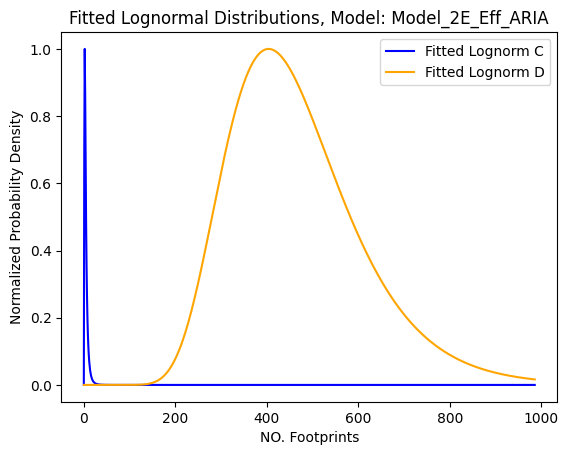

Labels are given, accuracy estimatation begins:
Model_2E_Eff_ARIA's binary damage detection P-R-F1 scores=
 No damage: 2164 	Damage: 593
 Prec:	 0.6928607942944955 
 Recall:	 0.6532845856363172 
 F1:	 0.5157542111697881 

Model_2E_Eff_ARIA's damage severity detection P-R-F1 scores=
 No: 2164 D damage: 7 	C Damage: 586
 Prec:	 0.5571318621005398 
 Recall:	 0.4531821445345701 
 F1:	 0.3657917713838807 


 Accuracy estimation:
| Overlap Threshold   |   Collapsed |   Possibly |
|---------------------+-------------+------------|
| >10                 |         972 |        471 |
| >20                 |         941 |        403 |
| >30                 |         927 |        344 |
| >40                 |         901 |        300 |
| >50                 |         867 |        259 |
| >60                 |         821 |        211 |
| >70                 |         762 |        174 |
| >80                 |         702 |        126 |
| >90                 |         572 |         77 |


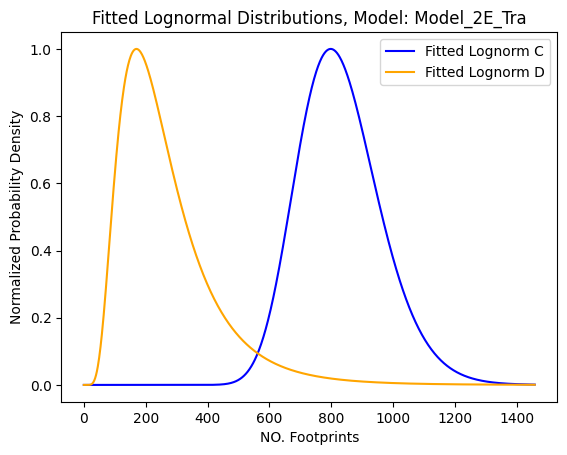

Labels are given, accuracy estimatation begins:
Model_2E_Tra's binary damage detection P-R-F1 scores=
 No damage: 1446 	Damage: 1311
 Prec:	 0.73003013125453 
 Recall:	 0.7700836506516897 
 F1:	 0.7117140008885325 

Model_2E_Tra's damage severity detection P-R-F1 scores=
 No: 1446 D damage: 940 	C Damage: 371
 Prec:	 0.5465966275271475 
 Recall:	 0.5106525428535628 
 F1:	 0.40321462525344004 


 Accuracy estimation:
| Overlap Threshold   |   Collapsed |   Possibly |
|---------------------+-------------+------------|
| >10                 |         294 |       1028 |
| >20                 |         290 |        984 |
| >30                 |         287 |        931 |
| >40                 |         284 |        871 |
| >50                 |         271 |        805 |
| >60                 |         257 |        730 |
| >70                 |         239 |        653 |
| >80                 |         221 |        539 |
| >90                 |         176 |        415 |


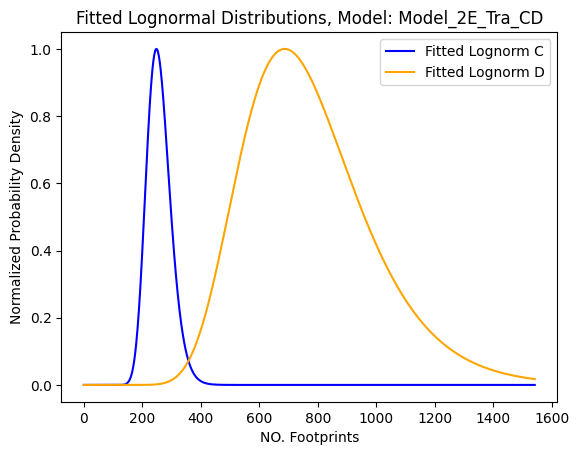

Labels are given, accuracy estimatation begins:
Model_2E_Tra_CD's binary damage detection P-R-F1 scores=
 No damage: 1515 	Damage: 1242
 Prec:	 0.760232617464645 
 Recall:	 0.8032763481591406 
 F1:	 0.7329179344171326 

Model_2E_Tra_CD's damage severity detection P-R-F1 scores=
 No: 1515 D damage: 287 	C Damage: 955
 Prec:	 0.5830973636794878 
 Recall:	 0.5931947098389921 
 F1:	 0.5491300059421417 


 Accuracy estimation:


In [4]:
# Mathcing segmentation geo-polygons with the building footprints
'''
This also outputs the inventory parquet with two new columns PD and PC that shows
the resulting overlapping ratio, upon which various illustration in the manuscript
can be drawn
into a single parquet file geometry for C and D damages
│── Results
│   └── Model-X
│       └── Shape_Files
│           └── D.aprquet
│           └── C.aprquet
'''
Models=['Model_2E_Eff','Model_2E_Eff_CD','Model_2E_Eff_ARIA','Model_2E_Tra','Model_2E_Tra_CD','Model_2E_Tra_ARIA']
A.Poly_to_Matching(Models,T=0.25)

In [6]:
# Ensemble of Six models: (Alg 1) in paper
'''
This module ensembles the six initial models, saving the resulting
segmentation masks as follows
into a single parquet file geometry for C and D damages
│── Results
│   └── Ensemble
│       └── Mask_Results_C
│       └── Mask_Results_D

Masks also transformed into polygons, saved as
│── Results
│   └── Ensemble
│       └── Shape_Files
│           └── C.parquet
│           └── D.parquet
'''
A.Ensemble(['C','D'])
# And, assessment is followed as:
A.Poly_to_Matching(['Ensemble'],T=0.25)

Ensemble for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Ensemble for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Ensemble Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Ensemble Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

In [11]:
A.Model_Mask(Models,['C','D'],rotate=True)

Model_2E_Eff's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

In [12]:
A.Rotation_Ens(Models,['C','D'])

Ensemble across rotations:


Ensemble across rotations:   0%|          | 0/6 [00:00<?, ?it/s]

Ensemble for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Ensemble for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for EnsembleR Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for EnsembleR Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |           86 |         1138 |
| >20                 |           79 |         1099 |
| >30                 |           76 |         1051 |
| >40                 |           73 |         1008 |
| >50                 |           72 |          947 |
| >60                 |           68 |          894 |
| >70                 |           59 |          810 |
| >80                 |           45 |          720 |
| >90                 |           27 |          588 |


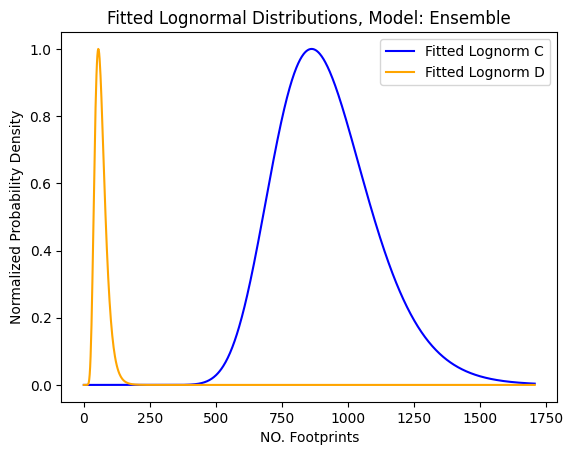

Labels are given, accuracy estimatation begins:
Ensemble's binary damage detection P-R-F1 scores=
 No damage: 1601 	Damage: 1156
 Prec:	 0.7576266131245826 
 Recall:	 0.7953129374224253 
 F1:	 0.7159855031614383 

Ensemble's damage severity detection P-R-F1 scores=
 No: 1601 D damage: 77 	C Damage: 1079
 Prec:	 0.6310787712471901 
 Recall:	 0.5836825074293593 
 F1:	 0.5467935284182457 



In [4]:
A.Poly_to_Matching(['Ensemble'],T=0.25)


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |          345 |         1461 |
| >20                 |          331 |         1415 |
| >30                 |          316 |         1380 |
| >40                 |          302 |         1340 |
| >50                 |          289 |         1289 |
| >60                 |          278 |         1214 |
| >70                 |          258 |         1148 |
| >80                 |          239 |         1028 |
| >90                 |          192 |          878 |


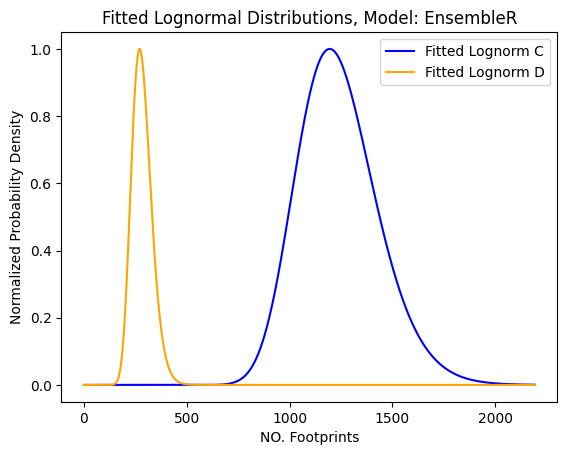

Labels are given, accuracy estimatation begins:
EnsembleR's binary damage detection P-R-F1 scores=
 No damage: 1042 	Damage: 1715
 Prec:	 0.8587069047525784 
 Recall:	 0.8970216255453458 
 F1:	 0.8718687923900474 

EnsembleR's damage severity detection P-R-F1 scores=
 No: 1042 D damage: 319 	C Damage: 1396
 Prec:	 0.792821582862946 
 Recall:	 0.8440645070085866 
 F1:	 0.8112712983312608 



In [5]:
A.Poly_to_Matching(['EnsembleR'],T=0.25)

| Type   | Collapsed   | Possibly   |
|--------+-------------+------------|
| >10    | 456(16.5%)  | 127(4.60%) |
| >20    | 401(14.5%)  | 105(3.80%) |
| >30    | 368(13.3%)  | 90(3.26%)  |
| >40    | 339(12.2%)  | 80(2.90%)  |
| >50    | 307(11.1%)  | 72(2.61%)  |
| >60    | 276(10.0%)  | 66(2.39%)  |
| >70    | 233(8.45%)  | 53(1.92%)  |
| >80    | 196(7.10%)  | 47(1.70%)  |
| >90    | 154(5.58%)  | 34(1.23%)  |


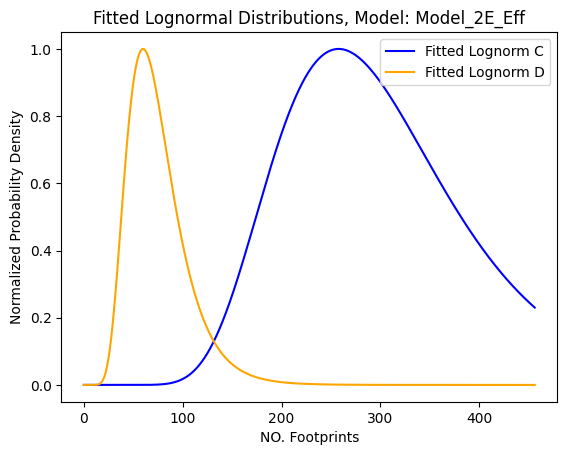

Labels are given, accuracy estimatation begins:

 Accuracy estimation:
No Label is given
| Type   | Collapsed   | Possibly   |
|--------+-------------+------------|
| >10    | 730(26.4%)  | 263(9.53%) |
| >20    | 694(25.1%)  | 229(8.30%) |
| >30    | 660(23.9%)  | 204(7.39%) |
| >40    | 623(22.5%)  | 189(6.85%) |
| >50    | 588(21.3%)  | 162(5.87%) |
| >60    | 551(19.9%)  | 148(5.36%) |
| >70    | 503(18.2%)  | 128(4.64%) |
| >80    | 454(16.4%)  | 104(3.77%) |
| >90    | 406(14.7%)  | 85(3.08%)  |


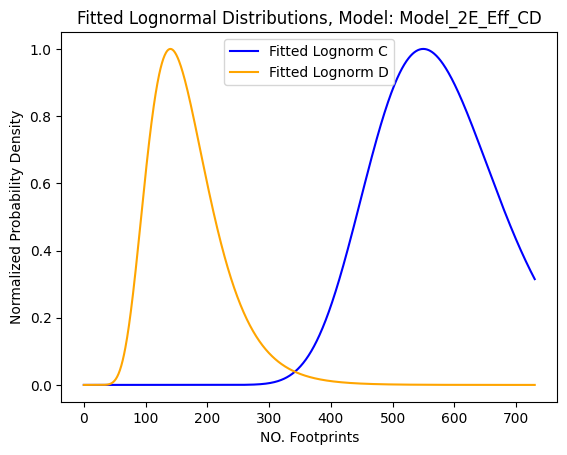

Labels are given, accuracy estimatation begins:

 Accuracy estimation:
No Label is given
| Type   | Collapsed   | Possibly   |
|--------+-------------+------------|
| >10    | 688(24.9%)  | 12(0.43%)  |
| >20    | 633(22.9%)  | 9(0.32%)   |
| >30    | 590(21.4%)  | 9(0.32%)   |
| >40    | 554(20.0%)  | 9(0.32%)   |
| >50    | 522(18.9%)  | 8(0.29%)   |
| >60    | 468(16.9%)  | 5(0.18%)   |
| >70    | 432(15.6%)  | 4(0.14%)   |
| >80    | 364(13.2%)  | 2(0.07%)   |
| >90    | 311(11.2%)  | 1(0.03%)   |


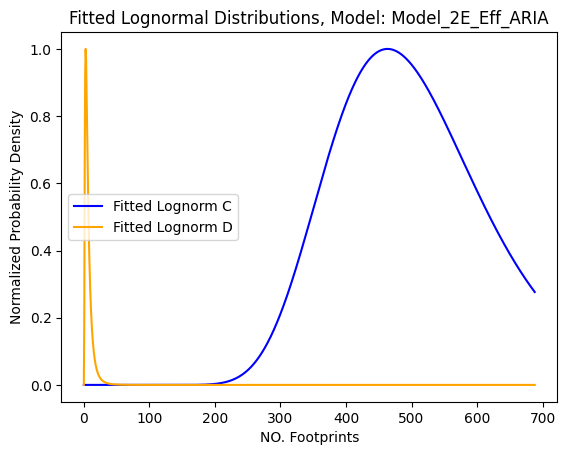

Labels are given, accuracy estimatation begins:

 Accuracy estimation:
No Label is given


In [17]:
import geopandas as gpd
for Model in Models:
    Source=cwd
    cwd=cwd
    CSVS_Source=Source+'/Data/CSVS/'
    A=gpd.read_parquet(Source+'/Results/'+Model+'/Shape_Files/D.parquet')
    B=gpd.read_parquet(Source+'/Results/'+Model+'/Shape_Files/C.parquet')
    F_A=Source+'FootPrints/'
    foot=gpd.read_parquet(cwd+'/Data/Inventory.parquet')
    foot['geometry']=foot['geometry'].buffer(0)
    foot['centroid']=foot['geometry'].centroid
    ID=['id', 'D0', 'P0', 'DR0', 'PR0', 'D1', 'P1', 'DR1', 'PR1', 'D2', 'P2',
            'DR2', 'PR2', 'D3', 'P3', 'DR3', 'PR3', 'D4', 'P4', 'DR4', 'PR4', 'D5',
            'P5', 'DR5', 'PR5', 'D6', 'P6', 'DR6', 'PR6', 'D7', 'P7', 'DR7', 'PR7',
            'D8', 'P8', 'DR8', 'PR8', 'D9', 'P9', 'DR9', 'PR9', 'D10', 'P10',
            'DR10', 'PR10', 'N']
    
    G=os.listdir(CSVS_Source)
    for iG in np.arange(0,len(G),1):
        if iG==0:
            Geom=gpd.read_parquet(CSVS_Source+G[iG])
            Geom['lat']=Geom.centroid.x
            Geom=Geom[Geom.columns[::-1]]
            Geom[ID]=0
            Geom['id']=iG+1
            #G[iG][G[iG].find('.')-1:G[iG].find('.')]
            Geom1=Geom.copy()
        else:
            Geom=gpd.read_parquet(CSVS_Source+G[iG])
            Geom['lat']=Geom.centroid.x
            Geom=Geom[Geom.columns[::-1]]
            Geom[ID]=0
            Geom['id']=iG+1
            #G[iG][G[iG].find('.')-1:G[iG].find('.')]
            try:
                Geom1=Geom1.append(Geom)
            except:
                Geom1 = gpd.GeoDataFrame(pd.concat( (Geom1,Geom), ignore_index=True) )
    Sample=Geom1.copy()
######### C
    for i in np.arange(0,len(A),1):
        ind=int(A['id'].iloc[i])
        Mask=A['geometry'].iloc[i]
        I=(gpd.read_parquet(CSVS_Source+'Blocks_geom'+str(ind)+'.parquet')['geometry'].iloc[0])
        L=foot[foot['centroid'].within(I)]
        for i1 in range(len(L)):
            KK=L['geometry'].iloc[i1]
            try:
                Overlap_R=(KK.intersection(Mask)).area/KK.area
            except:
                Overlap_R=(make_valid(KK).intersection(make_valid(Mask))).area/KK.area
            if(Overlap_R>0.01):
                Sample.iloc[ind,4]+=1
            if(Overlap_R>0.1):
                Sample.iloc[ind,8]+=1
            if(Overlap_R>0.2):
                Sample.iloc[ind,12]+=1
            if(Overlap_R>0.3):
                Sample.iloc[ind,16]+=1
            if(Overlap_R>0.4):
                Sample.iloc[ind,20]+=1
            if(Overlap_R>0.5):
                Sample.iloc[ind,24]+=1
            if(Overlap_R>0.6):
                Sample.iloc[ind,28]+=1
            if(Overlap_R>0.7):
                Sample.iloc[ind,32]+=1
            if(Overlap_R>0.8):
                Sample.iloc[ind,36]+=1
            if(Overlap_R>0.9):
                Sample.iloc[ind,38]+=1
            if(Overlap_R>0.99):
                Sample.iloc[ind,42]+=1
# D
    for i in np.arange(0,len(B),1):
        ind=int(B['id'].iloc[i])
        Mask=B['geometry'].iloc[i]
        I=(gpd.read_parquet(CSVS_Source+'Blocks_geom'+str(ind)+'.parquet')['geometry'].iloc[0])
        L=foot[foot['centroid'].within(I)]
        for i1 in range(len(L)):
            KK=L['geometry'].iloc[i1]
            try:
                Overlap_R=(KK.intersection(Mask)).area/KK.area
            except:
                Overlap_R=(make_valid(KK).intersection(make_valid(Mask))).area/KK.area
            if(Overlap_R>0.01):
                Sample.iloc[ind,3]+=1
            if(Overlap_R>0.1):
                Sample.iloc[ind,7]+=1
            if(Overlap_R>0.2):
                Sample.iloc[ind,11]+=1
            if(Overlap_R>0.3):
                Sample.iloc[ind,15]+=1
            if(Overlap_R>0.4):
                Sample.iloc[ind,19]+=1
            if(Overlap_R>0.5):
                Sample.iloc[ind,23]+=1
            if(Overlap_R>0.6):
                Sample.iloc[ind,27]+=1
            if(Overlap_R>0.7):
                Sample.iloc[ind,31]+=1
            if(Overlap_R>0.8):
                Sample.iloc[ind,35]+=1
            if(Overlap_R>0.9):
                Sample.iloc[ind,39]+=1
            if(Overlap_R>0.99):
                Sample.iloc[ind,43]+=1
    Sample.to_parquet(Source+'/Results/'+Model+'/Shape_Files/Block_RatiosT.parquet')


    A=np.zeros((22,1))
    z=[]
    for i in range(0,11):
        A[i*2+0]=np.sum(Sample['D'+str(i)])
        A[i*2+1]=np.sum(Sample['P'+str(i)])
        z.append(str(int(A[i*2+0][0]))+'('+str(100*int(A[i*2+0][0])/len(foot))[0:4]+'%'+')')
        z.append(str(int(A[i*2+1][0]))+'('+str(100*int(A[i*2+1][0])/len(foot))[0:4]+'%'+')')
    print(tabulate([['>10', z[0],z[1]], ['>20', z[2],z[3]], ['>30', z[4],z[5]], ['>40', z[6],z[7]],['>50', z[8],z[9]], ['>60',z[10],z[11]], ['>70', z[12],z[13]], ['>80', z[14],z[15]],['>90', z[16],z[17]]], headers=['Type','Collapsed','Possibly'], tablefmt='orgtbl'))         


    # Generate sample data (replace these with your actual data)
    data1 = np.asarray([A[0][0],A[2][0],A[4][0],A[6][0],A[8][0],A[10][0],A[12][0],A[14][0],A[16][0]])
    data2 = np.asarray([A[1][0],A[3][0],A[5][0],A[7][0],A[9][0],A[11][0],A[13][0],A[15][0],A[17][0]])

    # Fit lognormal distributions to the data
    params1 = lognorm.fit(data1,floc=0)
    params2 = lognorm.fit(data2,floc=0)


    # Plot the PDF of the fitted distributions
    x = np.linspace(0, max(data1.max(), data2.max())*1.5, 1000)
    pdf1 = lognorm.pdf(x, *params1)
    pdf1=pdf1/np.max(pdf1)
    pdf2 = lognorm.pdf(x, *params2)
    pdf2=pdf2/np.max(pdf2)
    plt.plot(x, pdf1, label='Fitted Lognorm C', color='blue')
    plt.plot(x, pdf2, label='Fitted Lognorm D', color='orange')

    # Add labels and legend
    plt.xlabel('NO. Footprints')
    plt.ylabel('Normalized Probability Density')
    plt.title('Fitted Lognormal Distributions, Model: '+Model)
    plt.legend()

    # Show plot
    plt.show()

    try:
        Label_gpd=gpd.read_parquet(cwd+'/Data/Geom_Labels.parquet')
        print('Labels are given, accuracy estimatation begins:')
        geod = Geod(ellps="WGS84")
        Damage_Cases=['C','D']
        #self.damages
        print('\n Accuracy estimation:')
        Foot=gpd.read_parquet(cwd+'/Data/Inventory.parquet')
        SQ=np.where(Foot.columns=='SQMETERS')[0][0]
        Foot[['PC','PD']]=0
        ff=len(Foot.columns)
        #Foot[Foot['Damage']==np.nan]['Damage']=0
        for kk2 in range(len(Damage_Cases)):
            PP=gpd.read_parquet(cwd+'/Results/'+Model+'/Shape_files/'+Damage_Cases[kk2]+'.parquet')
            Geom=unary_union(PP['geometry'])
            for KL in range(len(Foot)):
                Foot.iloc[KL,SQ]=abs(geod.geometry_area_perimeter(Foot['geometry'].iloc[KL])[0])
                Foot.iloc[KL,ff-2+kk2]=(make_valid(Foot['geometry'].iloc[KL]).intersection(Geom)).area/(Foot['geometry'].iloc[KL].area)
                
                #Breaking the overlap-inventory parquet to three portions
        # one: no damage, second, damage D, thirs damage C
        Foot.to_parquet(Source+'/Results/'+Model+'/Shape_Files/Inventory_Results.parquet')
        Inv_overlap=Foot.copy()

        Z=Inv_overlap[Inv_overlap['PD']<T].copy()
        Z=Z[Z['PC']<T].copy()
        AP=Inv_overlap.drop(index=Z.index)
        ZD=AP[AP['PC']>=T].copy()
        AP=AP.drop(index=ZD.index)
        ZP=AP.copy()
        Z1=Z.copy()
        Z2=ZP.copy()
        Z3=ZD.copy()

        # Binary damage detection problem
        Z1['Label']=0
        Z2['Label']=1
        Z3['Label']=1
        LLL=pd.concat((Z1,pd.concat((Z2,Z3))))
        LLL=LLL.merge(Label_gpd[['geometry','Label']], on='geometry')
        Labels=LLL['Label_x'].copy()
        Pred=LLL['Label_y'].copy()
        Pred[Pred==2]=1
        DF1=precision_recall_fscore_support(Pred,Labels,average='macro')
        print(Model+"'s binary damage detection P-R-F1 scores=\n",'No damage:',str(len(Z1)),'\tDamage:',str(len(Z2)+len(Z3)))
        print(' Prec:\t',DF1[0],'\n Recall:\t',DF1[1],'\n F1:\t',DF1[2],'\n')

        # Three label damage detection problem
        Z1['Label']=0
        Z2['Label']=1
        Z3['Label']=2
        LLL=pd.concat((Z1,pd.concat((Z2,Z3))))
        LLL=LLL.merge(Label_gpd[['geometry','Label']], on='geometry')
        Labels=LLL['Label_x'].copy()
        Pred=LLL['Label_y'].copy()
        DF2=precision_recall_fscore_support(Pred,Labels,average='macro')
        print(Model+"'s damage severity detection P-R-F1 scores=\n",'D damage:',str(len(Z2)),'\tC Damage:',str(len(Z3)))
        print(' Prec:\t',DF2[0],'\n Recall:\t',DF2[1],'\n F1:\t',DF2[2],'\n')
    except:
        print('No Label is given')


In [14]:
A[0]

array([456.])

In [13]:
A

array([[456.],
       [127.],
       [401.],
       [105.],
       [368.],
       [ 90.],
       [339.],
       [ 80.],
       [307.],
       [ 72.],
       [276.],
       [ 66.],
       [233.],
       [ 53.],
       [196.],
       [ 47.],
       [154.],
       [ 34.],
       [117.],
       [  0.],
       [ 61.],
       [  0.]])

In [12]:
z[1]

'127(4.60%)'

In [9]:
import os
import numpy as np
from PIL import Image
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageOps
import torchvision
get_ipython().system('pip install git+https://github.com/qubvel/segmentation_models.pytorch')
import segmentation_models_pytorch as smp
import albumentations as A  
from albumentations.pytorch import ToTensorV2
import tqdm
try:
    from tqdm.notebook import tqdm
except:
    from tqdm import tqdm
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import shapely

import rasterio
from rasterio.plot import reshape_as_image
import tensorflow as tf
import keras
from keras.applications.vgg19 import VGG19
from keras.utils import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input
import sys
from skimage import filters #change to 'import filter' for Python>v2.7
from skimage import exposure
from keras import backend as K
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely import wkt
import pandas as pd
from shapely.validation import make_valid
from shapely.ops import unary_union
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from pyproj import Geod
from scipy.stats import lognorm
import urllib
import patoolib
import shutil
import albumentations as A 
import random
import tabulate
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

  Cloning https://github.com/qubvel/segmentation_models.pytorch to c:\users\solei\appdata\local\temp\pip-req-build-znnd68mx
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch 'C:\Users\solei\AppData\Local\Temp\pip-req-build-znnd68mx'


In [8]:
#A.Poly_to_Matching(['Ensemble'],T=0.25)

In [9]:
A.Model_Mask(Models,['C','D'],rotate=True)

Model_2E_Eff's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

In [10]:
A.Rotation_Ens(Models,['C','D'])

Ensemble across rotations:


Ensemble across rotations:   0%|          | 0/6 [00:00<?, ?it/s]

Ensemble for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Ensemble for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for EnsembleR Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for EnsembleR Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

In [12]:
A.Poly_to_Matching(['Ensemble','EnsembleR'],T=0.25)

| Type   | Collapsed   | Possibly   |
|--------+-------------+------------|
| >10    | 1140(41.3%) | 214(7.76%) |
| >20    | 1102(39.9%) | 178(6.45%) |
| >30    | 1077(39.0%) | 160(5.80%) |
| >40    | 1035(37.5%) | 151(5.47%) |
| >50    | 997(36.1%)  | 136(4.93%) |
| >60    | 935(33.9%)  | 122(4.42%) |
| >70    | 874(31.7%)  | 109(3.95%) |
| >80    | 792(28.7%)  | 88(3.19%)  |
| >90    | 704(25.5%)  | 68(2.46%)  |

 Accuracy estimation:
Ensemble's binary damage detection P-R-F1 scores=
 No damage: 1602 	Damage: 1155
 Prec:	 0.7574606417303047 
 Recall:	 0.795051567845844 
 F1:	 0.7156416936999556 

Ensemble's damage severity detection P-R-F1 scores=
 D damage: 77 	C Damage: 1078
 Prec:	 0.6309684014338911 
 Recall:	 0.583480242057191 
 F1:	 0.546552004733673 

| Type   | Collapsed   | Possibly   |
|--------+-------------+------------|
| >10    | 1447(52.4%) | 912(33.0%) |
| >20    | 1413(51.2%) | 847(30.7%) |
| >30    | 1382(50.1%) | 806(29.2%) |
| >40    | 1354(49.1%) | 757(27.4%) |
|

Ensemble across rotations:


Ensemble across rotations:   0%|          | 0/6 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\solei\\RAPIDA_2\\RAPID_A/Results/Model_2E_Eff/Mask_Results_C_0/1.png'

In [ ]:
A.Ensemble(['C','D'],rotate=True)

Ensemble for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\solei\\RAPIDA_2\\RAPID_A/Results/Model_2E_Eff/Mask_Results_DE/1.png'

In [ ]:
from tqdm.notebook import tqdm_notebook

# Create a tqdm_notebook object
progress_bar = tqdm_notebook(total=100)

# Update the progress bar
for i in range(100):
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
!pip install --upgrade jupyter ipywidgets

   ---------------------------------------- 0.0/123.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/123.4 kB ? eta -:--:--
   ---------------------------------------- 123.4/123.4 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/93.5 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/93.5 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 93.5/93.5 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/66.4 kB ? eta -:--:--
   ------------------------ --------------- 41.0/66.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 66.4/66.4 kB 720.2 kB/s eta 0:00:00


In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:

!pip install https://github.com/tensorflow/tensorflow/releases/tag/v2.15.0





     - 0 bytes ? 0:00:00
     - 50.7 kB 1.3 MB/s 0:00:00
     - 169.3 kB 2.5 MB/s 0:00:00


  ERROR: Cannot unpack file C:\Users\solei\AppData\Local\Temp\pip-unpack-0sxzd5cq\v2.15.0 (downloaded from C:\Users\solei\AppData\Local\Temp\pip-req-build-dk9eij8_, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of C:\Users\solei\AppData\Local\Temp\pip-req-build-dk9eij8_


In [ ]:
!pip install tensorflow
import keras
from keras import backend as K
keras.__version__

In [ ]:
import tensorflow